In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [140]:
np.random.seed(42)

In [141]:
n = 50

Here Y is a random normal samples as described in the exercise and X is obtained from Y by exponentiating.

In [142]:
Y = np.random.normal(size=n)

In [143]:
X = np.exp(Y)

Here is a histogram of the random variables $X_i$. We can see that their distribution seems to have positive skew.

Text(0.5, 1.0, 'Histogram of random variables $X_i=e^{Y_i}$')

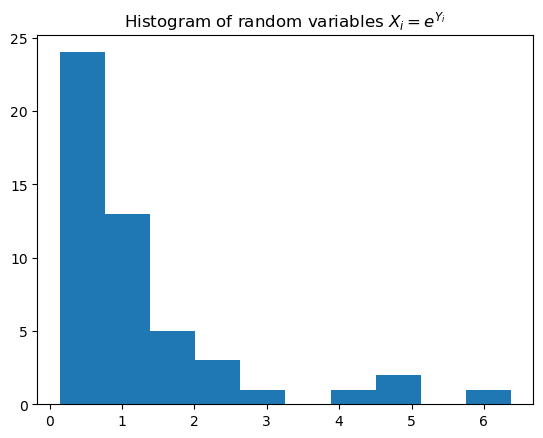

In [144]:
plt.hist(X)
plt.title('Histogram of random variables $X_i=e^{Y_i}$')

We calculate the sample skew below. It does turn out to be positive.

In [145]:
skew = lambda x: np.mean((x - np.mean(x))**3)/np.mean((x-np.mean(x))**2)**(3/2)

In [146]:
T = skew(X)

In [147]:
print('Sample skew: {:.4f}'.format(T))

Sample skew: 2.2270


Here we calculate skewness over B bootstrap samples and estimate the standard error using the bootstrap samples.

In [148]:
B = int(1e5)

In [149]:
T_boot = np.empty(B)

In [150]:
for i in range(B):
    X_star = np.random.choice(X, size=n, replace=True)
    T_boot[i] = skew(X_star)

Text(0.5, 1.0, 'Histogram of skews over B bootstrap samples')

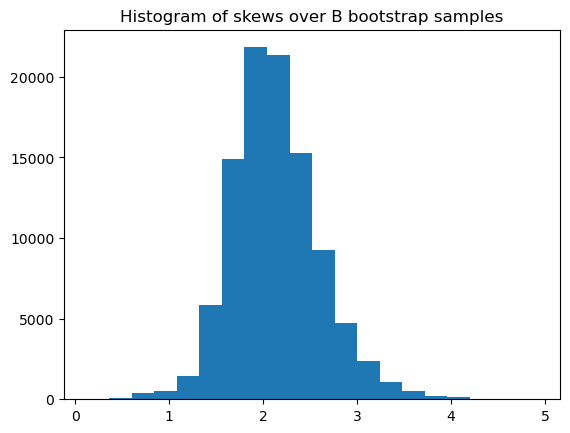

In [151]:
plt.hist(T_boot, bins=20)
plt.title('Histogram of skews over B bootstrap samples')

In [152]:
se = np.std(T_boot)

In [153]:
alpha = 0.05

In [154]:
z = norm.ppf(1-alpha/2)

In [155]:
low_quant = np.quantile(T_boot, alpha/2)

In [156]:
up_quant = np.quantile(T_boot, 1-alpha/2)

We calculate confidence intervals using the standard methods.

In [157]:
print('Estimated skewness: {:.3f}'.format(T))
print('Estimated standard error: {:.3f}'.format(se))
print('Normal inverval: ({0:.4f}, {1:.4f})'.format(T-z*se, T+z*se))
print('Pivotal interval: ({0:.4f}, {1:.4f})'.format(2*T-up_quant, 2*T-low_quant))
print('Percentile interval: ({0:.4f}, {1:.4f})'.format(low_quant, up_quant))

Estimated skewness: 2.227
Estimated standard error: 0.468
Normal inverval: (1.3092, 3.1447)
Pivotal interval: (1.2857, 3.1292)
Percentile interval: (1.3247, 3.1682)


Now let's repeat the same experiment 30 times and calculate confidence intervals each time. Below, normal_lows will be an array of the lower bounds of the normal confidence intervals that we calculate on each repetition. Similarly for pivotal and percentile. skews will hold the sample skews for each repetition, and ses will hold the estimated standard errors for each repetition.

In [158]:
reps = 30

In [159]:
normal_lows = np.empty(reps)
normal_ups = np.empty(reps)
pivotal_lows = np.empty(reps)
pivotal_ups = np.empty(reps)
percentile_lows = np.empty(reps)
percentile_ups = np.empty(reps)
skews = np.empty(reps)
ses = np.empty(reps)

In [160]:
for i in range(reps):
    Y = np.random.normal(size=n)
    X = np.exp(Y)
    T = skew(X)
    T_boot = np.empty(B)
    for j in range(B):
        X_star = np.random.choice(X, size=n, replace=True)
        T_boot[j] = skew(X_star)
    se = np.std(T_boot)
    low_quant = np.quantile(T_boot, 0.025)
    up_quant = np.quantile(T_boot, 0.975)
    normal_low = T-z*se
    normal_up = T+z*se
    pivotal_low = 2*T-up_quant
    pivotal_up = 2*T-low_quant
    percentile_low = low_quant
    percentile_up = up_quant
    normal_lows[i] = normal_low
    normal_ups[i] = normal_up
    percentile_lows[i] = percentile_low
    percentile_ups[i] = percentile_up
    pivotal_lows[i] = pivotal_low
    pivotal_ups[i] = pivotal_up
    skews[i] = T
    ses[i] = se
    print('Estimated skewness: {:.4f}'.format(T))
    print('Estimated standard error: {:.4f}'.format(se))
    print('Normal inverval: ({0:.5f}, {1:.5f})'.format(normal_low, normal_up))
    print('Pivotal interval: ({0:.5f}, {1:.5f})'.format(pivotal_low, pivotal_up))
    print('Percentile interval: ({0:.5f}, {1:.5f})'.format(percentile_low, percentile_up))
    print('')

Estimated skewness: 1.1511
Estimated standard error: 0.2895
Normal inverval: (0.58363, 1.71857)
Pivotal interval: (0.53410, 1.66396)
Percentile interval: (0.63824, 1.76810)

Estimated skewness: 2.0844
Estimated standard error: 0.4715
Normal inverval: (1.16025, 3.00847)
Pivotal interval: (1.27405, 3.16504)
Percentile interval: (1.00368, 2.89468)

Estimated skewness: 1.8877
Estimated standard error: 0.5174
Normal inverval: (0.87356, 2.90188)
Pivotal interval: (1.19814, 3.20085)
Percentile interval: (0.57459, 2.57730)

Estimated skewness: 1.9348
Estimated standard error: 0.4451
Normal inverval: (1.06240, 2.80716)
Pivotal interval: (1.13411, 2.87616)
Percentile interval: (0.99340, 2.73546)

Estimated skewness: 1.2032
Estimated standard error: 0.3065
Normal inverval: (0.60246, 1.80403)
Pivotal interval: (0.55737, 1.76319)
Percentile interval: (0.64330, 1.84912)

Estimated skewness: 1.6745
Estimated standard error: 0.3477
Normal inverval: (0.99295, 2.35600)
Pivotal interval: (0.96515, 2.3327

Let's draw some histograms.

Text(0.5, 1.0, 'Histogram of calculated skews over 30 samples of size 50 from $N(0,1)$')

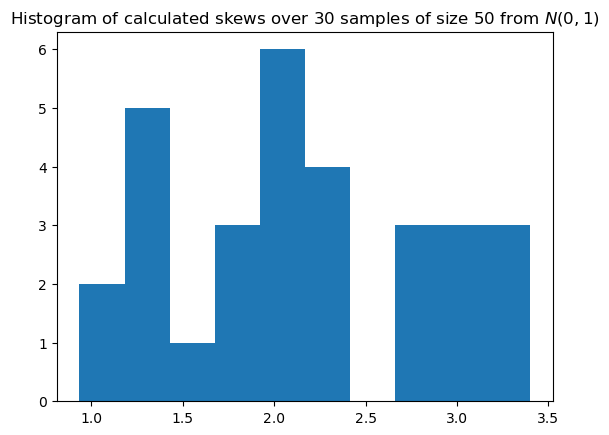

In [161]:
plt.hist(skews, bins=10)
plt.title('Histogram of calculated skews over 30 samples of size 50 from $N(0,1)$')

Text(0.5, 1.0, 'Histogram of normal confidence interval lower bounds')

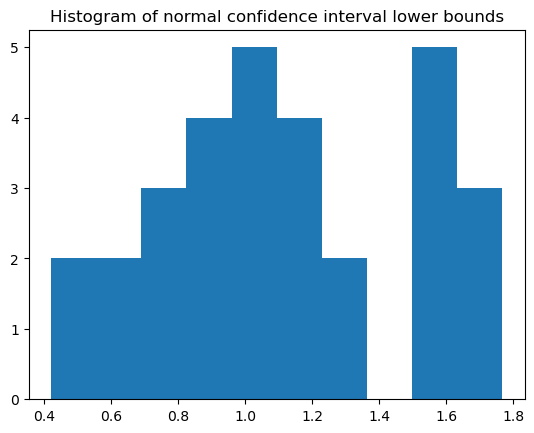

In [162]:
plt.hist(normal_lows, bins=10)
plt.title('Histogram of normal confidence interval lower bounds')

Text(0.5, 1.0, 'Histogram of normal confidence interval upper bounds')

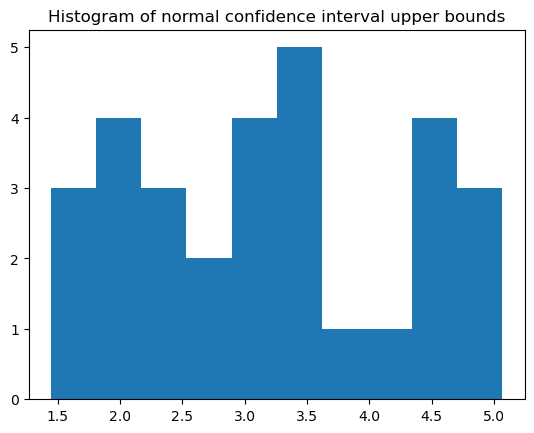

In [163]:
plt.hist(normal_ups, bins=10)
plt.title('Histogram of normal confidence interval upper bounds')

I'll estimate true confidence intervals from each method by using the average of the confidence intervals over the 30 different repetitions. These tend to be a little bit bigger than the intervals we originally calculated.

In [164]:
print('Estimated normal interval: ({0:.5f}, {1:.5f})'.format(np.mean(normal_lows), np.mean(normal_ups)))
print('Estimated pivotal interval: ({0:.5f}, {1:.5f})'.format(np.mean(pivotal_lows), np.mean(pivotal_ups)))
print('Estimated percentile interval: ({0:.5f}, {1:.5f})'.format(np.mean(percentile_lows), np.mean(percentile_ups)))

Estimated normal interval: (1.10335, 3.18721)
Estimated pivotal interval: (1.28197, 3.35836)
Estimated percentile interval: (0.93220, 3.00858)
